✅ Database successfully copied to current folder!
Plotting data for 60 hotels...


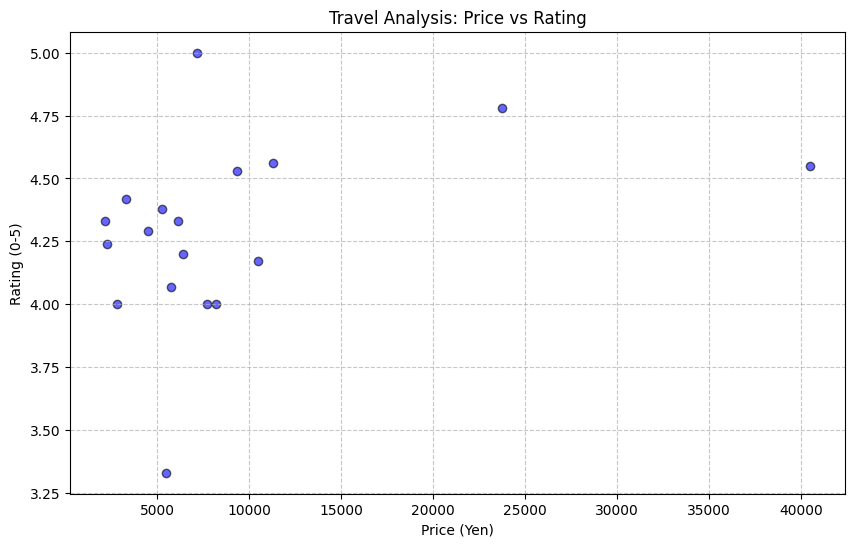

In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import shutil
import os

# --- FIX: COPY THE DATABASE ---
# We grab the database from where the terminal created it and bring it here.
source_path = "/Users/janidujenuth/Lecture/MD1/travel.db"
destination_path = "travel.db"

try:
    shutil.copy(source_path, destination_path)
    print("✅ Database successfully copied to current folder!")
except FileNotFoundError:
    print("⚠️ Could not copy file automatically. Proceeding anyway (check if travel.db exists).")

# --- ANALYSIS CODE ---
# 1. Connect to the database (now in the right place)
conn = sqlite3.connect(destination_path) 

# 2. Load Data
try:
    df = pd.read_sql("SELECT * FROM hotels", conn)
    conn.close()
    
    # 3. Plot Graph
    if not df.empty:
        print(f"Plotting data for {len(df)} hotels...")
        plt.figure(figsize=(10, 6))
        plt.scatter(df['price'], df['rating'], c='blue', alpha=0.6, edgecolors='black')
        
        plt.title("Travel Analysis: Price vs Rating")
        plt.xlabel("Price (Yen)")
        plt.ylabel("Rating (0-5)")
        plt.grid(True, linestyle='--', alpha=0.7)
        
        plt.show() # This makes the graph appear right here!
    else:
        print("Database is empty!")
        
except Exception as e:
    print(f"Error: {e}")